# Cases

Esta tabla contiene la información de las sentencias de tipo Match. --> ABEL COMPLETAR <--

## IMPORTANTE
Todos las instancias de la tabla Cases tienen expertise_level = EXPERT, con lo que solo se hara este analisis.  

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('cases')

# Table name, features and target.
TABLE_NAME = 'cases'
TABLE_FEATURES = ['case__number_of_cases', 'case__guards', 'case__average_match_value', 'case__average_body_count', 'case__average_match_singleton', 'case__average_match_sequence', 'case__average_match_mapping', 'case__average_match_class', 'case__average_match_star', 'case__average_match_as', 'case__average_match_or', 'case__expertise_level']
TABLE_TARGET = 'case__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-06-19 19:26:30.620107 Data cache files found ...
2024-06-19 19:26:30.620107 Data cache files successfully loaded!!
Features shape: (29, 12)
Target shape: (29,)
As we can see the downloaded data contains a total of 29 instances. For each instance we have 12 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   case__number_of_cases          29 non-null     int64  
 1   case__guards                   29 non-null     float64
 2   case__average_match_value      29 non-null     float64
 3   case__average_body_count       29 non-null     float64
 4   case__average_match_singleton  29 non-null     float64
 5   case__average_match_sequence   29 non-null     float64
 6   case__average_match_mapping    29 non-null     float64
 7   case__average_match_class      29 non-null     float64
 8   case__average_match_star       29 non-null     float64
 9   case__average_match_as         29 non-null     float64
 10  case__average_match_or         29 non-null     float64
 11  case__expertise_level          29 non-null     object 
dtypes: float64(10), int64(1), object(1)
memory usage: 2.

Cómo podemos ver la tabla está compuesta por 11 variables numéricas y una de tipo objeto. 

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 0.0% instances for BEGINNER class and 100.0% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [65.52%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

case__number_of_cases            0
case__guards                     0
case__average_match_value        0
case__average_body_count         0
case__average_match_singleton    0
case__average_match_sequence     0
case__average_match_mapping      0
case__average_match_class        0
case__average_match_star         0
case__average_match_as           0
case__average_match_or           0
case__expertise_level            0
dtype: int64

Aunque una columna no contenga valores nulos podría ser que contenga valores vacíos. Si los hubiese la siguiente función los mostraría.

In [6]:
print_empty_cols(X)

case__number_of_cases
---------------------
0 instancias no tienen un valor para la columna case__number_of_cases


case__guards
------------
0 instancias no tienen un valor para la columna case__guards


case__average_match_value
-------------------------
0 instancias no tienen un valor para la columna case__average_match_value


case__average_body_count
------------------------
0 instancias no tienen un valor para la columna case__average_body_count


case__average_match_singleton
-----------------------------
0 instancias no tienen un valor para la columna case__average_match_singleton


case__average_match_sequence
----------------------------
0 instancias no tienen un valor para la columna case__average_match_sequence


case__average_match_mapping
---------------------------
0 instancias no tienen un valor para la columna case__average_match_mapping


case__average_match_class
-------------------------
0 instancias no tienen un valor para la columna case__average_match_class


cas

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case__number_of_cases,29.0,NaN,NaN,NaN,5.103448,9.363092,2.0,2.0,3.0,4.0,51.0
case__guards,29.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_value,29.0,NaN,NaN,NaN,0.725106,0.224817,0.5,0.5,0.666667,1.0,1.0
case__average_body_count,29.0,NaN,NaN,NaN,1.884232,0.702019,1.0,1.039216,2.333333,2.5,3.0
case__average_match_singleton,29.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_sequence,29.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_mapping,29.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_class,29.0,NaN,NaN,NaN,0.001815,0.009773,0.0,0.0,0.0,0.0,0.052632
case__average_match_star,29.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
case__average_match_as,29.0,NaN,NaN,NaN,0.273079,0.226442,0.0,0.0,0.333333,0.5,0.5


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "case__number_of_cases": [(0.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, inf)],  # min: 2.0 max: 51.0 
    "case__guards": [(0.0, 0.0)],  # min: 0.0 max: 0.0 
    "case__average_match_value": [(0.0, 0.5), (0.5, 0.67), (0.67, inf)],  # min: 0.5 max: 1.0 
    "case__average_body_count": [(0.0, 1.15), (1.15, 2.33), (2.33, 2.5), (2.5, inf)],  # min: 1 max: 3.0 
    "case__average_match_singleton": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_sequence": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_mapping": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_class": [(0.0, inf)],  # min: 0 max: 0.0526 
    "case__average_match_star": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_or": [(0.0, 0.0)],  # min: 0 max: 0 
    "case__average_match_as": [(0.0, 0.0), (0.0, 0.34), (0.34, inf)],  # min: 0 max: 0.5
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['case__number_of_cases'], 10))
print(get_statistics(X_copy, ['case__guards'], 10))
print(get_statistics(X_copy, ['case__average_body_count'], 10))
print(get_statistics(X_copy, ['case__average_match_singleton'], 10))
print(get_statistics(X_copy, ['case__average_match_value'], 10))
print(get_statistics(X_copy, ['case__average_match_sequence'], 10))
print(get_statistics(X_copy, ['case__average_match_mapping'], 10))
print(get_statistics(X_copy, ['case__average_match_class'], 10))
print(get_statistics(X_copy, ['case__average_match_star'], 10))
print(get_statistics(X_copy, ['case__average_match_or'], 10))
print(get_statistics(X_copy, ['case__average_match_as'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['import__average_imported_modules', 'import__module_imports_pct'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['program__has_sub_dirs_with_code', 'program__has_packages', 'program__has_code_root_package'], 10))

--- SINGLE FEATURE ---
case__number_of_cases  count  percentage
            [2.0_3.0)     12   41.379310
            [4.0_inf]     10   34.482759
            [3.0_4.0)      7   24.137931

case__guards  count  percentage
   [0.0_0.0]     29       100.0

case__average_body_count  count  percentage
               [2.5_inf]     13   44.827586
              [0.0_1.15)      8   27.586207
             [1.15_2.33)      6   20.689655
              [2.33_2.5)      2    6.896552

case__average_match_singleton  count  percentage
                    [0.0_0.0]     29       100.0

case__average_match_value  count  percentage
               [0.5_0.67)     17    58.62069
               [0.67_inf]     12    41.37931

case__average_match_sequence  count  percentage
                   [0.0_0.0]     29       100.0

case__average_match_mapping  count  percentage
                  [0.0_0.0]     29       100.0

case__average_match_class  count  percentage
                [0.0_inf]     29       100.0

case__av

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (29, 12)
Target shape: (29,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

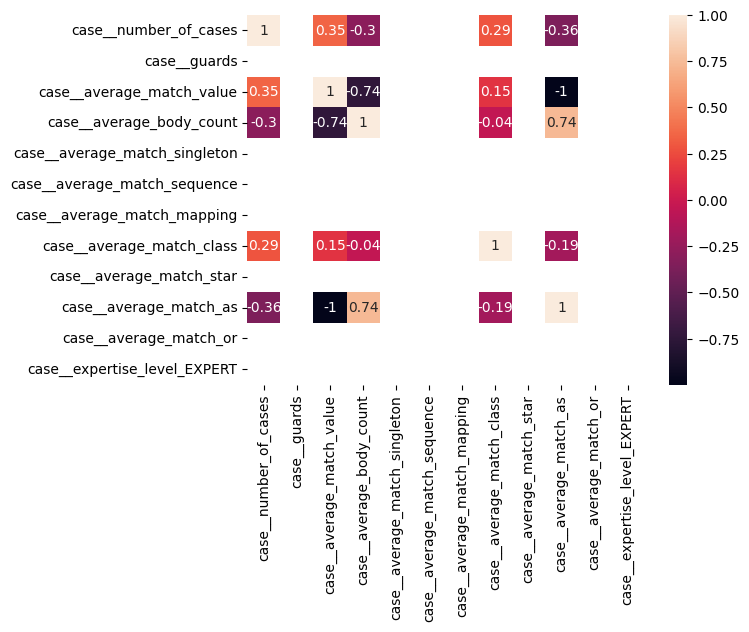

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 11 variable (11 numericas) se hara un analisis detallado

### Variable number_of_cases (1/11)
Esta variable es de tipo numérica y nos indica el número de clausulas case en la sentencia. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 2 - 51. Con una media de 5.17.

<Axes: ylabel='case__number_of_cases'>

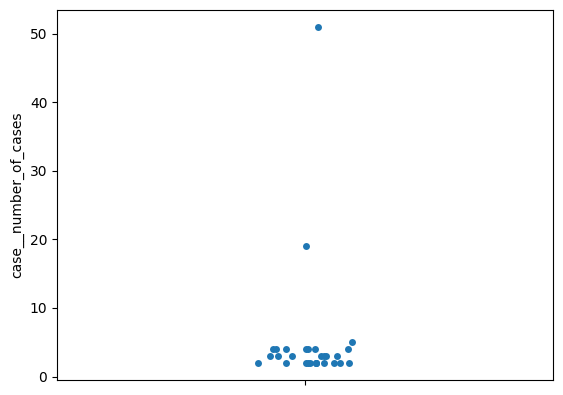

In [11]:
sns.stripplot(X['case__number_of_cases'])

### IMPORTANTE
Los valores maximos estan muy alejados del siguiente.

In [12]:
print_outliers_for_df_column(X, 'case__number_of_cases')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8026174306451153
Rango valores atípicos extremos (Tukey): [-4.0,10.0]
Rango valores atípicos leves (Tukey): [-1.0,7.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.8192334245818944,78.37218476487638]
-3.0IQR: 0 instancias tienen un valor para case__number_of_cases inferior a -4.0 (Q1-3*IQR) para case__number_of_cases. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__number_of_cases inferior a -1.0 (Q1-1.5*IQR) para case__number_of_cases. Representando un 0.0% del total de instancias.
+1.5IQR: 2 instancias tienen un valor para case__number_of_cases superior a 7.0 (Q3+1.5*IQR) para case__number_of_cases. Representando un 6.897% del total de instancias.
+3.0IQR: 2 instancias tienen un valor para case__number_of_cases superior a 10.0 (Q3-3*IQR) para case__number_of_cases. Representando un 6.897% del total de instancias.
L: 0 instancias tienen un valor para case__number_of_cases

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 10.0 (Con un MC de 79 usamos Tuckey Extremo)

In [13]:
X[X['case__number_of_cases'] > 10].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,2.000000,2.0,2.000000,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,2.0
mean,35.000000,0.0,0.947368,1.388029,0.0,0.0,0.0,0.026316,0.0,0.026316,0.0,1.0
std,22.627417,0.0,0.074432,0.493296,0.0,0.0,0.0,0.037216,0.0,0.037216,0.0,0.0
min,19.000000,0.0,0.894737,1.039216,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0
25%,27.000000,0.0,0.921053,1.213622,0.0,0.0,0.0,0.013158,0.0,0.013158,0.0,1.0
50%,35.000000,0.0,0.947368,1.388029,0.0,0.0,0.0,0.026316,0.0,0.026316,0.0,1.0
75%,43.000000,0.0,0.973684,1.562436,0.0,0.0,0.0,0.039474,0.0,0.039474,0.0,1.0
max,51.000000,0.0,1.000000,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0


### Variable guards (2/11)
Esta variable representa el número de guards de la sentencia. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__guards'>

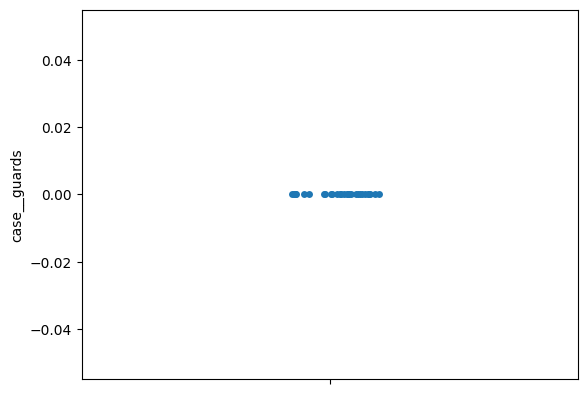

In [14]:
sns.stripplot(X['case__guards'])

### IMPORTANTE

Ningún Match tiene Guard. Esta variable toma siempre 0 como valor.

### Variable average_body_count (3/11)
Esta variable representa el número medio de sentencias en el cuerpo de los case. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1.0 - 3.0. Con una media de 1.91.

<Axes: ylabel='case__average_body_count'>

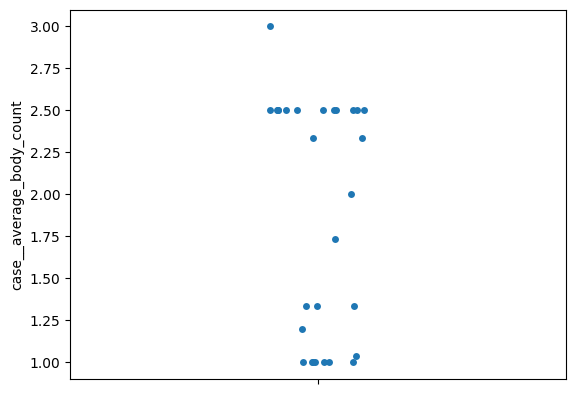

In [15]:
sns.stripplot(X['case__average_body_count'])

In [16]:
print_outliers_for_df_column(X, 'case__average_body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: -0.0998702954703819
Rango valores atípicos extremos (Tukey): [-3.343137264251709,6.882352948188782]
Rango valores atípicos leves (Tukey): [-1.1519607901573181,4.691176474094391]
Rango valores atípicos extremos (Fixed BoxPlot): [-2.2279399976541168,4.044797089740076]
-3.0IQR: 0 instancias tienen un valor para case__average_body_count inferior a -3.343137264251709 (Q1-3*IQR) para case__average_body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_body_count inferior a -1.1519607901573181 (Q1-1.5*IQR) para case__average_body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para case__average_body_count superior a 4.691176474094391 (Q3+1.5*IQR) para case__average_body_count. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para case__average_body_count superior a 6.882352948188782 (Q3-3*IQR) pa

In [17]:
X[X['case__average_body_count'] ==  1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,7.000000,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
mean,3.714286,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,0.487950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,3.500000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,4.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Nada que destacar

### Variable average_match_value (4/11)
Esta variable es de tipo numérica y nos indica el número medio de cases del tipo Value. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.5 - 1. Con una media de 0.71.

<Axes: ylabel='case__average_match_value'>

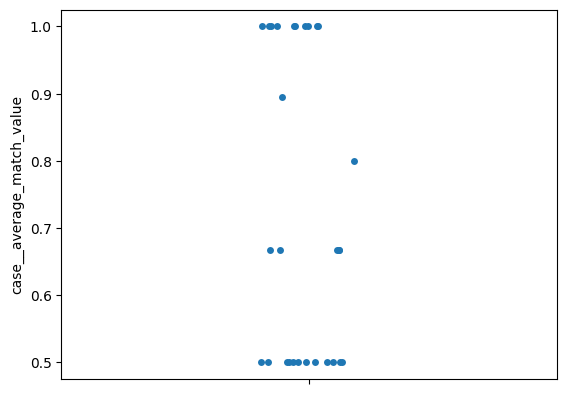

In [18]:
sns.stripplot(X['case__average_match_value'])

In [19]:
print_outliers_for_df_column(X, 'case__average_match_value')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.21645498275756836
Rango valores atípicos extremos (Tukey): [-1.0,2.5]
Rango valores atípicos leves (Tukey): [-0.25,1.75]
Rango valores atípicos extremos (Fixed BoxPlot): [0.14840471103298425,2.7827156692937995]
-3.0IQR: 0 instancias tienen un valor para case__average_match_value inferior a -1.0 (Q1-3*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_match_value inferior a -0.25 (Q1-1.5*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para case__average_match_value superior a 1.75 (Q3+1.5*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para case__average_match_value superior a 2.5 (Q3-3*IQR) para case__average_match_value. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un

In [20]:
X[X['case__average_match_value'] == 1.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,10.000000,10.0,10.0,10.000000,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,8.500000,0.0,1.0,1.303921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
std,14.938764,0.0,0.0,0.673123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,3.000000,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
25%,4.000000,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,4.000000,0.0,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,4.000000,0.0,1.0,1.029412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
max,51.000000,0.0,1.0,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### IMPORTANTE
Nada que destacar

### Variable average_match_singleton (5/11)
Esta variable representa el número medio de cases del tipo Singleton. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_singleton'>

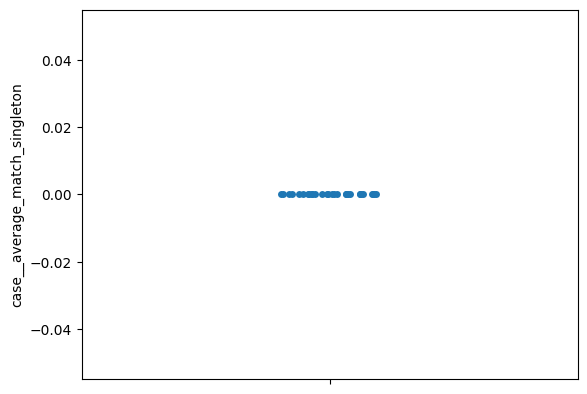

In [21]:
sns.stripplot(X['case__average_match_singleton'])

### IMPORTANTE 

No hay ningún Match que incluya un MatchSingleton. Esta variable toma siempre el valor 0

### Variable average_match_sequence (6/11)
Esta variable representa el número medio de cases del tipo Sequence. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_sequence'>

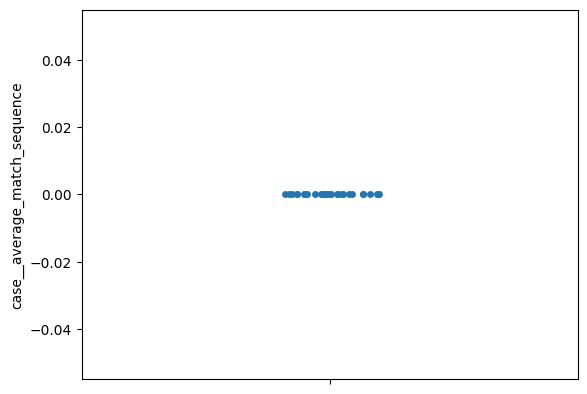

In [22]:
sns.stripplot(X['case__average_match_sequence'])

### IMPORTANTE 

No hay ningún Match que incluya un MatchSequence. Esta variable toma siempre el valor 0

### Variable average_match_mapping (7/11)
Esta variable representa el número medio de cases del tipo Mapping. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_mapping'>

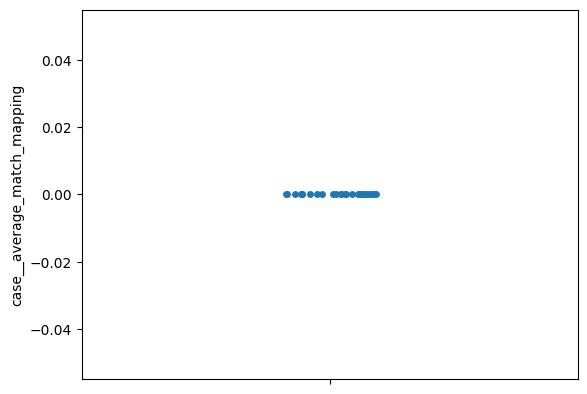

In [23]:
sns.stripplot(X['case__average_match_mapping'])

### IMPORTANTE 

No hay ningún Match que incluya un MatchMapping. Esta variable toma siempre el valor 0

### Variable average_match_star (8/11)
Esta variable representa el número medio de cases del tipo Star. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_star'>

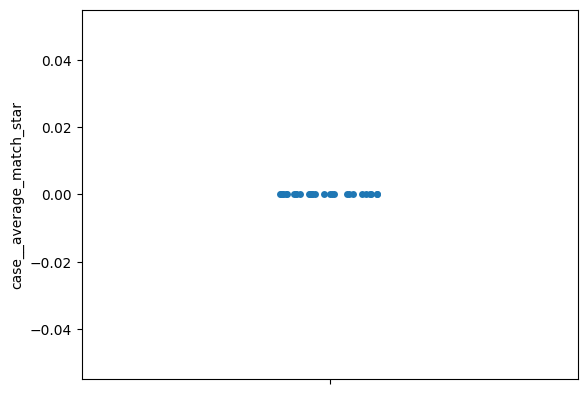

In [24]:
sns.stripplot(X['case__average_match_star'])

### IMPORTANTE 

No hay ningún Match que incluya un MatchStar. Esta variable toma siempre el valor 0

### Variable average_match_or (9/11)
Esta variable representa el número medio de cases del tipo Or. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 0. Con una media de 0.

<Axes: ylabel='case__average_match_or'>

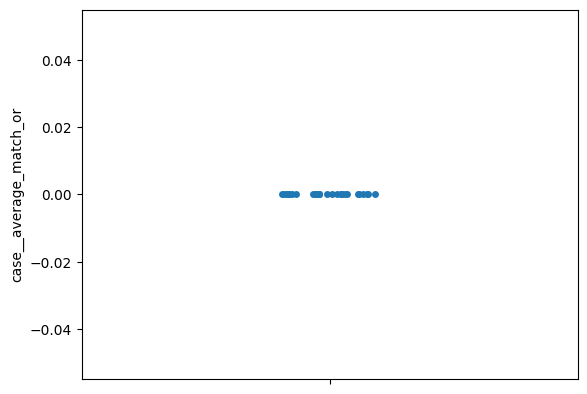

In [25]:
sns.stripplot(X['case__average_match_or'])

### IMPORTANTE 

No hay ningún Match que incluya un MatchOr. Esta variable toma siempre el valor 0

### Variable average_match_class (10/11)
Esta variable es de tipo numérica y nos indica el número medio de cases del tipo Match. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 0.052. Con una media de 0.0018.

<Axes: ylabel='case__average_match_class'>

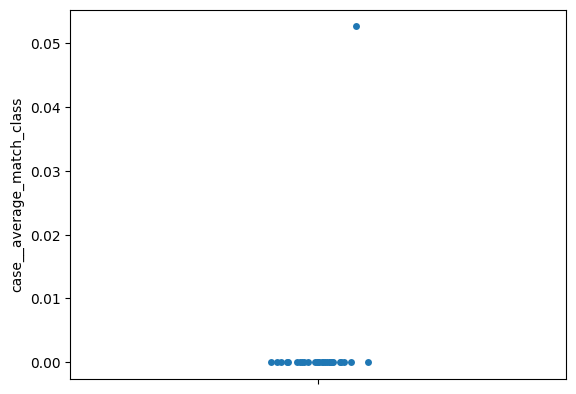

In [26]:
sns.stripplot(X['case__average_match_class'])

In [27]:
print_outliers_for_df_column(X, 'case__average_match_class')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.889910950873654
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para case__average_match_class inferior a 0.0 (Q1-3*IQR) para case__average_match_class. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_match_class inferior a 0.0 (Q1-1.5*IQR) para case__average_match_class. Representando un 0.0% del total de instancias.
+1.5IQR: 1 instancias tienen un valor para case__average_match_class superior a 0.0 (Q3+1.5*IQR) para case__average_match_class. Representando un 3.448% del total de instancias.
+3.0IQR: 1 instancias tienen un valor para case__average_match_class superior a 0.0 (Q3-3*IQR) para case__average_match_class. Representando un 3.448% del total de instancias.
L: 0 instancias tienen un valor para case__average_match_class

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [28]:
X[X['case__average_match_class'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.000000,1.0,1.000000,1.0,1.0
mean,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
25%,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
50%,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
75%,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0
max,19.0,0.0,0.894737,1.736842,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,1.0


### IMPORTANTE
El único distinto de 0 es un outlier, hay que revisarlo.

### Variable average_match_as (11/11)
Esta variable es de tipo numérica y nos indica el número medio de cases del tipo As. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0.0 - 0.5. Con una media de 0.28.

<Axes: ylabel='case__average_match_as'>

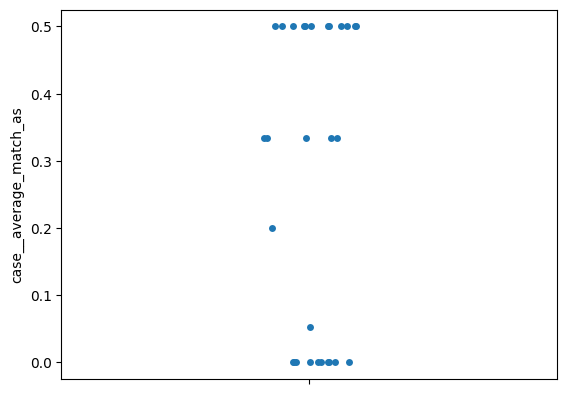

In [29]:
sns.stripplot(X['case__average_match_as'])

In [30]:
print_outliers_for_df_column(X, 'case__average_match_as')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.21938607120377837
Rango valores atípicos extremos (Tukey): [-1.5,2.0]
Rango valores atípicos leves (Tukey): [-0.75,1.25]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.3480067782508564,2.3037398652214875]
-3.0IQR: 0 instancias tienen un valor para case__average_match_as inferior a -1.5 (Q1-3*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para case__average_match_as inferior a -0.75 (Q1-1.5*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para case__average_match_as superior a 1.25 (Q3+1.5*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para case__average_match_as superior a 2.0 (Q3-3*IQR) para case__average_match_as. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para case__averag

In [31]:
X[X['case__average_match_as'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,case__number_of_cases,case__guards,case__average_match_value,case__average_body_count,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level_EXPERT
count,19.000000,19.0,19.000000,19.000000,19.0,19.0,19.0,19.000000,19.0,19.000000,19.0,19.0
mean,3.315789,0.0,0.580425,2.189658,0.0,0.0,0.0,0.002770,0.0,0.416805,0.0,1.0
std,3.873738,0.0,0.120603,0.504500,0.0,0.0,0.0,0.012075,0.0,0.128565,0.0,0.0
min,2.000000,0.0,0.500000,1.200000,0.0,0.0,0.0,0.000000,0.0,0.052632,0.0,1.0
25%,2.000000,0.0,0.500000,2.035088,0.0,0.0,0.0,0.000000,0.0,0.333333,0.0,1.0
50%,2.000000,0.0,0.500000,2.500000,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,1.0
75%,3.000000,0.0,0.666667,2.500000,0.0,0.0,0.0,0.000000,0.0,0.500000,0.0,1.0
max,19.000000,0.0,0.894737,2.500000,0.0,0.0,0.0,0.052632,0.0,0.500000,0.0,1.0


### IMPORTANTE
Nada que destacar

## Multivariate

Isolation forest algorithm

In [32]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,case__number_of_cases,case__guards,case__average_body_count,case__average_match_value,case__average_match_singleton,case__average_match_sequence,case__average_match_mapping,case__average_match_class,case__average_match_star,case__average_match_as,case__average_match_or,case__expertise_level
23,19,0.0,1.736842,0.894737,0.0,0.0,0.0,0.052632,0.0,0.052632,0.0,EXPERT


### IMPORTANTE
Hay que analizar el outlier detectado.

In [33]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
case__number_of_cases,1.0,19.000000,NaN,19.000000,19.000000,19.000000,19.000000,19.000000
case__guards,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
case__average_match_value,1.0,0.894737,NaN,0.894737,0.894737,0.894737,0.894737,0.894737
case__average_body_count,1.0,1.736842,NaN,1.736842,1.736842,1.736842,1.736842,1.736842
case__average_match_singleton,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
case__average_match_sequence,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
case__average_match_mapping,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
case__average_match_class,1.0,0.052632,NaN,0.052632,0.052632,0.052632,0.052632,0.052632
case__average_match_star,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
case__average_match_as,1.0,0.052632,NaN,0.052632,0.052632,0.052632,0.052632,0.052632


In [34]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
case__number_of_cases,28.0,4.607143,9.138195,2.0,2.000000,3.000000,4.0,51.0
case__guards,28.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
case__average_match_value,28.0,0.719048,0.226519,0.5,0.500000,0.666667,1.0,1.0
case__average_body_count,28.0,1.889496,0.714318,1.0,1.029412,2.333333,2.5,3.0
case__average_match_singleton,28.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
case__average_match_sequence,28.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
case__average_match_mapping,28.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
case__average_match_class,28.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
case__average_match_star,28.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
case__average_match_as,28.0,0.280952,0.226519,0.0,0.000000,0.333333,0.5,0.5
